<h1 style="text-align:left;font-size:130%">
    Experimental Software Engineering
    <span style="float:right">
        2024/2025
    </span>
</h1>

# <center>**Gym Activity** </center>

### **<center> Realized by: </center>** 
<center> Hasan Çinar, Letícia Cascais</center>

-------

# Contents

1. [Data Evaluation](#Avaliação-dados)
2. [Simultaneous Analysis](#juntar)
3. [Predictive Modeling](#previsoes)                                                                            

-------

In [62]:
#Necessary imports
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, recall_score, f1_score

-------

In [63]:
#Import file
gym_activity = pd.read_csv('gym_activity_cleaned.csv', sep = ',')
sns.set_theme(style="whitegrid")

-------

<a id="Avaliação-dados"></a>
# <center>Data Evaluation</center> 


In [64]:
#Data available in our Dataset
gym_activity

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,duration_h,calories_burned,workout_type,fat_percentage,water_l,workout_frequency_daysweek,experience_level,bmi
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,0,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,2,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,3,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,3,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,24,1,87.1,1.74,187,158,67,1.57,1364.0,3,10.0,3.5,4,3,28.77
927,25,1,66.6,1.61,184,166,56,1.38,1260.0,3,25.0,3.0,2,1,25.69
928,59,0,60.4,1.76,194,120,53,1.72,929.0,2,18.8,2.7,5,3,19.50
929,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


In [65]:
gym_activity.columns

Index(['age', 'gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'duration_h', 'calories_burned', 'workout_type',
       'fat_percentage', 'water_l', 'workout_frequency_daysweek',
       'experience_level', 'bmi'],
      dtype='object')

Moving on to analyzing **each column**

-------

## <center>Types of Features</center>

-------

**Categorical Features:**
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: **gender, workout_type**.

In the process of cleaning the data, **we transformed gender into numerical values 0 and 1 to represent female and male respectively**. Similarly, the workout_type variable was converted to values of 0, 1, 2 and 3, corresponding to the different types of training (**Yoga - 0, HIIT - 1, Cardio - 2, Strength - 3**). This was done to facilitate analysis and allow mathematical and statistical models to process this information properly.

**Ordinal Features:**
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 

Ordinal Features in the dataset: **experience_level, workout_frequency_daysweek**.

**Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Ordinal Features in the dataset: **age, weight_kg, height_m, max_bpm, avg_bpm, resting_bpm, duration_h, calories_burned, fat_percentage, water_l, bmi**.

In [66]:
data_categories = {
    "Feature": [
        "gender", "workout_type", "experience_level", "workout_frequency_daysweek",
        "age", "weight_kg", "height_m", "max_bpm", "avg_bpm", "resting_bpm", 
        "duration_h", "calories_burned", "fat_percentage", "water_l", "bmi"
    ],
    "Type": [
        "Categorical", "Categorical", "Ordinal", "Ordinal",
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous",
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"
    ],
    "Dependent/Independent": [
        "Independent", "Independent", "Independent", "Independent",
        "Independent", "Independent", "Independent", "Independent", "Independent", "Independent",
        "Independent", "Dependent", "Dependent", "Dependent", "Dependent"
    ]
}

# Convert to a DataFrame
features_table = pd.DataFrame(data_categories)

# Display the table
features_table

,Feature,Type,Dependent/Independent
0,gender,Categorical,Independent
1,workout_type,Categorical,Independent
2,experience_level,Ordinal,Independent
3,workout_frequency_daysweek,Ordinal,Independent
4,age,Continuous,Independent
5,weight_kg,Continuous,Independent
6,height_m,Continuous,Independent
7,max_bpm,Continuous,Independent
8,avg_bpm,Continuous,Independent
9,resting_bpm,Continuous,Independent


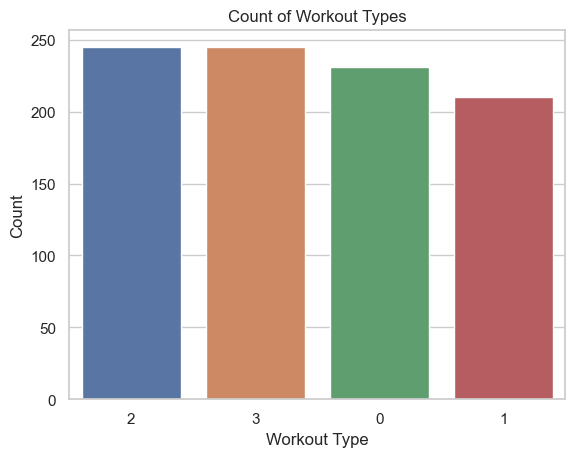

In [67]:
#Get the order of categories based on their counts
order = gym_activity['workout_type'].value_counts().index.to_list()

ax = sns.countplot(data=gym_activity, x='workout_type', order=order)
ax.set(title='Count of Workout Types', xlabel='Workout Type', ylabel='Count')
plt.show() 

In [68]:
gym_activity['workout_type'].value_counts()

workout_type
2    245
3    245
0    231
1    210
Name: count, dtype: int64

As seen above, the most common workout type is 2 and 3, which corresponds to **Cardio and Strength**.

<a id="juntar"></a>
# <center>Simultaneous Analysis</center> 

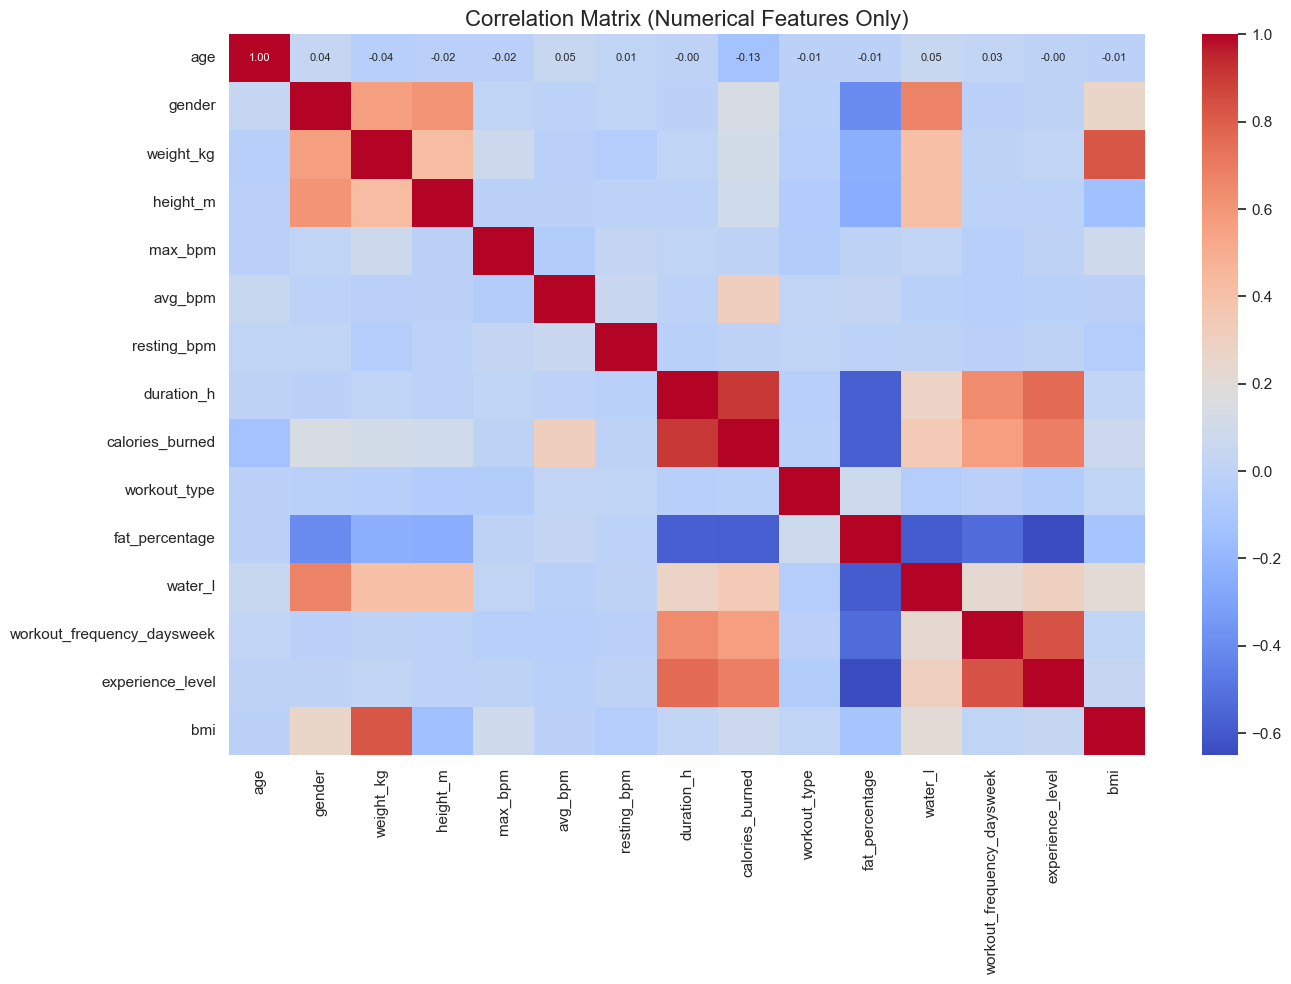

In [69]:
#Select only numerical columns
numerical_columns = gym_activity.select_dtypes(include=['float64', 'int64'])

#Generate the correlation matrix
correlation_matrix = numerical_columns.corr()

#Adjusting the heatmap visualization for better clarity
plt.figure(figsize=(14, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title("Correlation Matrix (Numerical Features Only)", fontsize=16)
plt.tight_layout() 
plt.show()

The correlation matrix highlights the relationships between numerical features in the dataset and their correlation with the **target** variable **workout_frequency_daysweek**.

**experience_level:** Likely the highest positive correlation with workout_frequency_daysweek.
This indicates that more experienced individuals are likely to work out more frequently, which aligns with the idea that experienced fitness enthusiasts prioritize consistency in their routines.

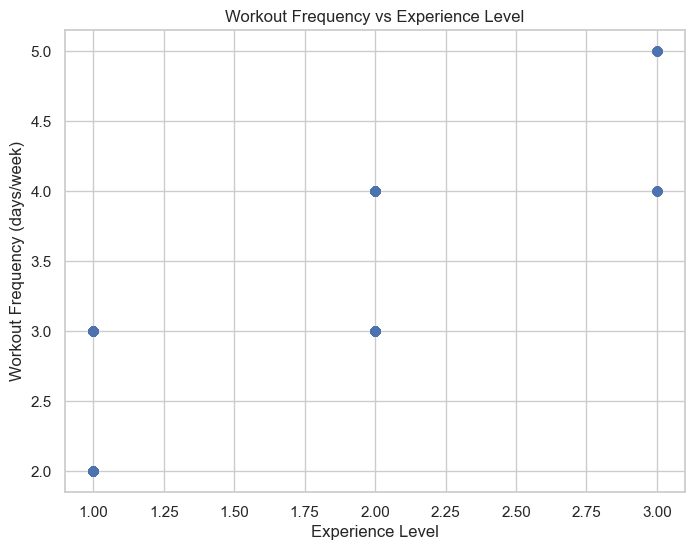

In [70]:
#Selecting columns for analysis
x = gym_activity['experience_level']
y = gym_activity['workout_frequency_daysweek']

#Calculate correlation
correlation = x.corr(y)

#Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Workout Frequency vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')
plt.grid(True)
plt.show()

In [71]:
print(f"Correlation: {correlation}")

Correlation: 0.8370359700461473


The correlation between **experience_level** and **workout_frequency_daysweek** is **0.837**. This value indicates a strong positive correlation between these variables.

As the level of experience increases, the weekly frequency of training also tends to increase consistently. This suggests that more experienced people have a greater commitment or ability to train more regularly. This relationship is visually corroborated by the scatter plot, where there is a clear upward trend between the variables.

In order to carry out a more precise analysis, we want to know if the increase in experience level is also associated with longer training sessions, complementing the analysis of the individuals behavior.

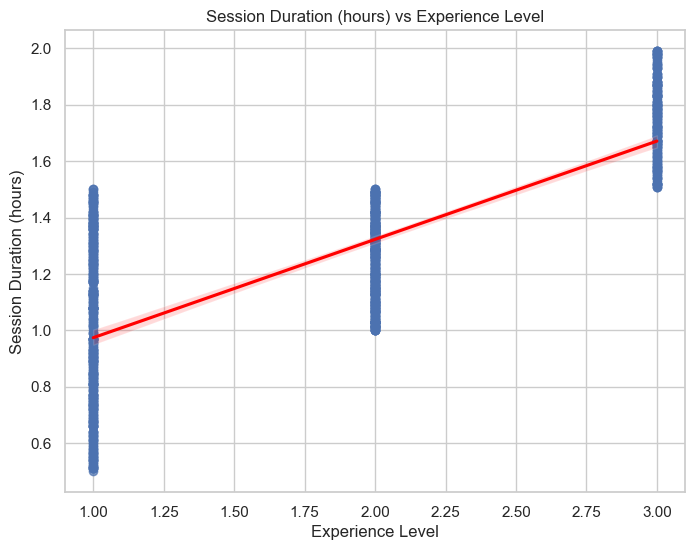

In [72]:
#Calculate correlation for the new analysis
x = gym_activity['experience_level']
y = gym_activity['duration_h']

correlation = x.corr(y)

#Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='experience_level', y='duration_h', data=gym_activity, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Session Duration (hours) vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Session Duration (hours)')
plt.grid(True)
plt.show()

In [73]:
print(f"Correlation: {correlation}")

Correlation: 0.7588119606033765


The correlation between **experience_level** and the average **duration of training sessions (hours)** is **0.759**, indicating a strong positive correlation between these variables.

The data suggests that as the level of experience increases, training sessions tend to be longer. The scatter plot, with a clear upward trend and the regression line in red, visually confirms this relationship. This may reflect that more experienced individuals have greater capacity or motivation to sustain longer training sessions. 

-------

<a id="previsoes"></a>
# <center>Predictive Models</center> 

The project focuses on predictive modeling to understand patterns of behavior, specifically related to calorie burn, which is a key metric for physical well-being. We will use two machine learning models will be used to predict the target variable **workout_frequency_daysweek: Decision Tree Regressor, Linear Regression**. To ensure that the results of the models are understandable and transparent, the SHAP (SHapley Additive exPlanations) library will be used. SHAP makes it possible to interpret the predictions by quantifying the contribution of each variable to the model's results, providing clear insights into the impact of each characteristic on the predicted behavior.

In [74]:
import shap

-------

<a id="previsao1"></a>
# Regression algorithms

### Decision Tree Regressor

=== SHAP Analysis for Decision Tree Regressor ===


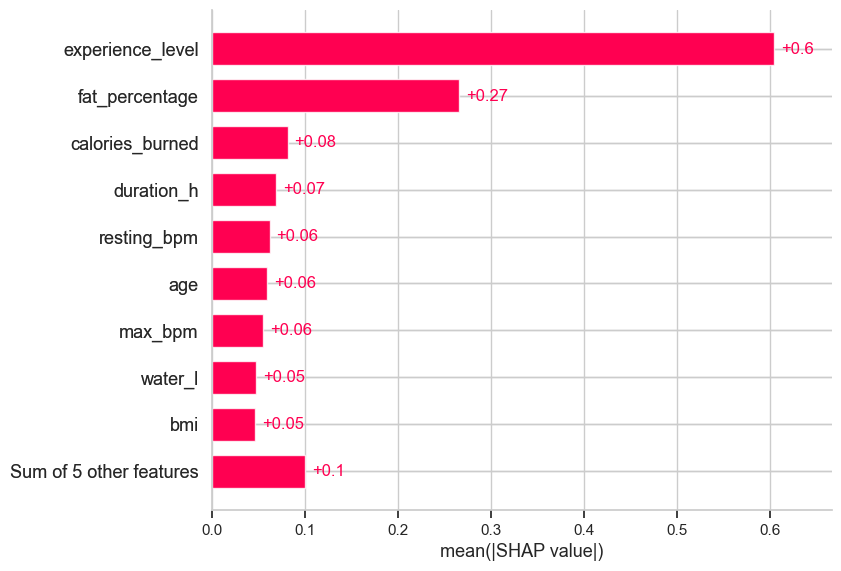

In [75]:
#Defining the features (X) and target (y)
X = gym_activity.drop(columns=['workout_frequency_daysweek'])
y = gym_activity['workout_frequency_daysweek']  #Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

#Predictions
y_pred = tree_model.predict(X_test)

#Initialize SHAP explainer
tree_explainer = shap.Explainer(tree_model, X_train)

#Compute SHAP values
tree_shap_values = tree_explainer(X_test)

#SHAP bar plot
print("=== SHAP Analysis for Decision Tree Regressor ===")
shap.plots.bar(tree_shap_values, show=True)

In [76]:
#Define feature columns (excluding  'max_bpm', 'water_l', and 'bmi')
feature_columns = [
    col for col in gym_activity.columns
    if col not in ['max_bpm', 'water_l', 'bmi', 'workout_frequency_daysweek']
]

# Define X (features) e y (target)
X = gym_activity[feature_columns]
y = gym_activity['workout_frequency_daysweek']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

#Predictions
y_pred = tree_model.predict(X_test)

#Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#Display metrics
print("=== Metrics for Decision Tree Regressor (After Feature Removal) ===")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

#Initialize SHAP explainer
tree_explainer = shap.Explainer(tree_model, X_train)

#Compute SHAP values
tree_shap_values = tree_explainer(X_test)

=== Metrics for Decision Tree Regressor (After Feature Removal) ===
MSE: 0.5241
MAE: 0.5241
RMSE: 0.7239
R²: 0.4652


### Linear Regression

=== SHAP Analysis for Linear Regression ===


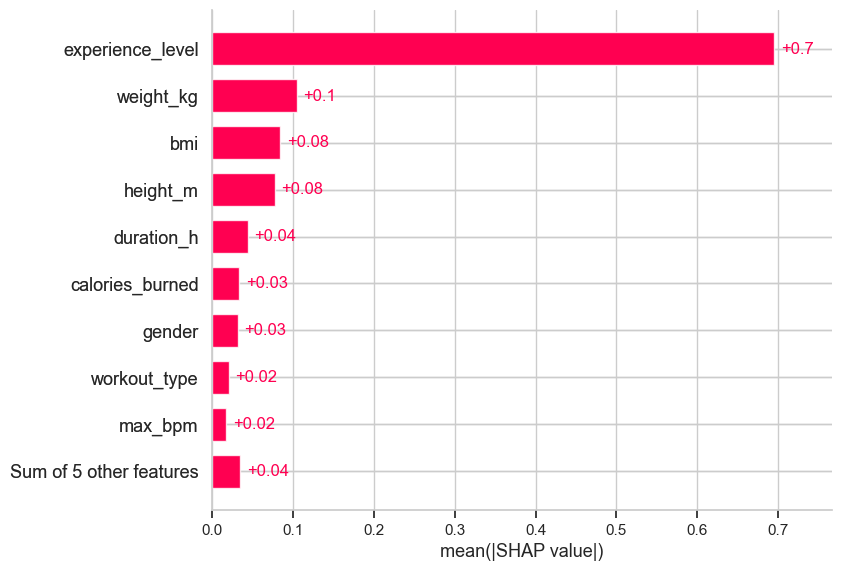

In [77]:
#Defining the features (X) and target (y)
X = gym_activity.drop(columns=['workout_frequency_daysweek'])
y = gym_activity['workout_frequency_daysweek']  #Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Predictions
y_pred = linear_model.predict(X_test)

#Initialize SHAP explainer
linear_explainer = shap.Explainer(linear_model, X_train)

#Compute SHAP values
linear_shap_values = linear_explainer(X_test)

#Display SHAP bar plot
print("=== SHAP Analysis for Linear Regression ===")
shap.plots.bar(linear_shap_values, show=True)

In [78]:
#Define feature columns (excluding 'max_bpm', 'workout_type' and 'gender')
feature_columns = [
    col for col in gym_activity.columns
    if col not in ['max_bpm', 'workout_type', 'gender', 'workout_frequency_daysweek']
]

#Define X (features) e y (target)
X = gym_activity[feature_columns]
y = gym_activity['workout_frequency_daysweek']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Predictions
y_pred = linear_model.predict(X_test)

#Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#Display metrics
print("=== Metrics for Linear Regression (After Feature Removal) ===")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

#Initialize SHAP explainer
linear_explainer = shap.Explainer(linear_model, X_train)

#Compute SHAP values
linear_shap_values = linear_explainer(X_test)

=== Metrics for Linear Regression (After Feature Removal) ===
MSE: 0.2544
MAE: 0.5006
RMSE: 0.5044
R²: 0.7404


-------

### Train and predict using all models

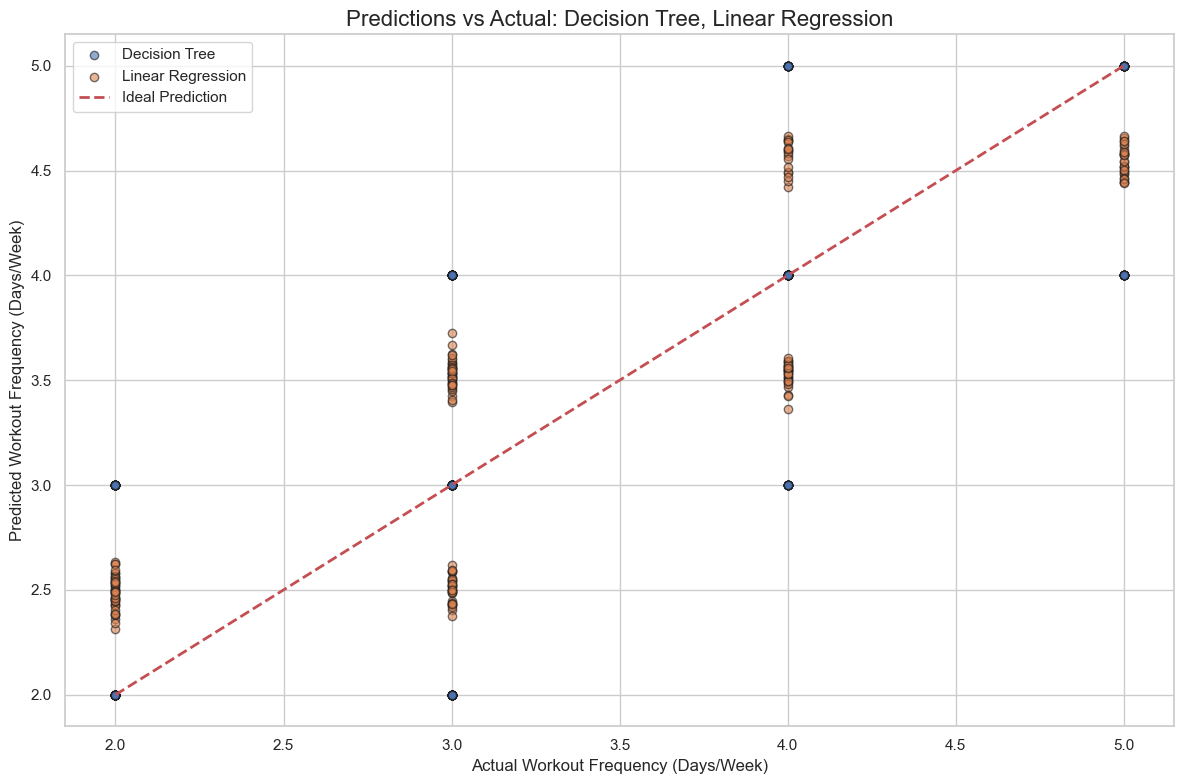

In [ ]:
#Using the cleaned dataset for model training and prediction

#Define features (X) and target (y)
X = gym_activity.drop(columns=['workout_frequency_daysweek'])
y = gym_activity['workout_frequency_daysweek']

#Standardizing numeric features
X_scaled = scaler.fit_transform(X)

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Training the models
tree_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

#Predictions
DTR_y_pred = tree_model.predict(X_test)
LR_y_pred = linear_model.predict(X_test)

#Plotting Predictions vs Actual
plt.figure(figsize=(12, 8))

#Decision Tree predictions
plt.scatter(y_test, DTR_y_pred, alpha=0.6, label="Decision Tree", edgecolor='k')

#Linear Regression predictions
plt.scatter(y_test, LR_y_pred, alpha=0.6, label="Linear Regression", edgecolor='k')

#Ideal Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")

#Graph details
plt.title("Predictions vs Actual: Decision Tree and Linear Regression", fontsize=16)
plt.xlabel("Actual Workout Frequency (Days/Week)", fontsize=12)
plt.ylabel("Predicted Workout Frequency (Days/Week)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the values provided for the models after removing some variables, we can conclude that the **Linear Regression** model showed the best overall performance. It has the highest coefficient of determination (R² = 0.7404), which means that it explains 74.04% of the variance in the data, as well as having the lowest values for mean absolute error (MAE = 0.5006) and root mean square error (RMSE = 0.5044). This indicates that its predictions are closer to the real values, making it the most accurate of the models evaluated.

The **Decision Tree** model had the worst performance, with a coefficient of determination of R² = 0.4652, explaining only 46.52% of the variance in the data. Its error values (MAE = 0.5241 and RMSE = 0.7239) are significantly higher, indicating that its predictions are less accurate.


In [80]:
#Define a threshold using the median of the training set
threshold = y_train.median()

#Binarize predictions and actual values for classification
DTR_y_pred_class = (DTR_y_pred >= threshold).astype(int)
LR_y_pred_class = (LR_y_pred >= threshold).astype(int)

y_test_class = (y_test >= threshold).astype(int)

#Function to calculate classification metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  #True negatives, false positives, false negatives, true positives
    
    #Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 
    
    return accuracy, precision, recall, f1, specificity

#Calculate metrics for each model
DTR_metrics = calculate_metrics(y_test_class, DTR_y_pred_class)
LR_metrics = calculate_metrics(y_test_class, LR_y_pred_class)

#Organize results into a DataFrame
classification_metrics = pd.DataFrame({
    "Model": ["Decision Tree", "Linear Regression"],
    "Accuracy": [DTR_metrics[0], LR_metrics[0]],
    "Precision": [DTR_metrics[1], LR_metrics[1]],
    "Recall": [DTR_metrics[2], LR_metrics[2]],
    "F1 Score": [DTR_metrics[3], LR_metrics[3]],
    "Specificity": [DTR_metrics[4], LR_metrics[4]]
})

#Display the classification metrics
classification_metrics

,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Decision Tree,0.796791,0.876812,0.852113,0.864286,0.622222
1,Linear Regression,0.834225,1.000000,0.781690,0.877470,1.000000


-------

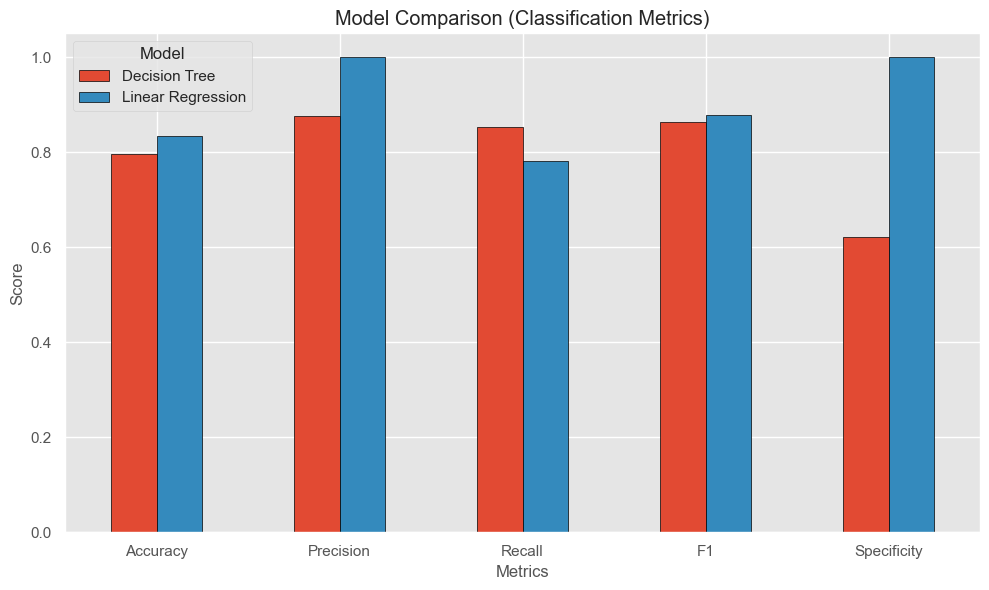

In [81]:
#Organize metrics into a DataFrame
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'Specificity'],
    'Decision Tree': DTR_metrics,
    'Linear Regression': LR_metrics
}

metrics_df = pd.DataFrame(metrics_data).set_index('Metric')

# Plot the comparison
plt.style.use('ggplot')
metrics_df.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Model Comparison (Classification Metrics)')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the results of the evaluation metrics, the **Linear Regression model** showed the best overall performance, with an accuracy of 83.42% and an F1 Score of 87.75%. This model have perfect accuracy (100%), indicating that they did not generate false positives, as well as specificity of 100%, showing excellent ability to correctly identify negative cases. However, both had a lower recall (78.17%) compared to the Decision Tree model, indicating that they missed some positive cases.

The **Decision Tree** had a lower accuracy (79.68%) and a slightly lower F1 Score (86.43%), but had a higher recall (85.21%), which means it was able to correctly identify more positive cases. However, its specificity was the lowest (62.22%), indicating difficulty in correctly predicting negative cases.

In general, the Linear Regression models is more robust, especially if the priority is to avoid false positives and ensure high prediction accuracy. However, the Decision Tree may be preferred if it is more important to correctly identify the largest number of positive cases, even with lower accuracy and specificity. 